Retrieving data from the nhl api

In [ ]:
import requests
import pandas as pd

#function to retrieve all goal locations from a player in a given season
def getPlayerGoals(season,gameType,player):
    goalLocations = []
    #number of games in a season varies by year
    season = int(season) #cast to an int
    if season>2020: seasonLength = str(41*32)
    elif season == 2020: seasonLength = str(28*31)
    elif season < 2020 and season >= 2017: seasonLength = str(41*31)
    elif season < 2017 and season >= 2010: seasonLength = str(41*30)
    else: raise Exception("There is no location data before 2010")
    
    #get start and end gameIds
    season = str(season) #cast back to string
    idStart = int(season+gameType+'0001')
    idEnd = int(season+gameType+seasonLength)

    #loop through every game of the season
    for gameId in range(idStart,idEnd):
        #get url with proper gameId, convert to json
        API_URL = f"https://statsapi.web.nhl.com/api/v1/game/{gameId}/feed/live"
        shotR = requests.get(API_URL, params={"Content-Type": "application/json"})
        shotData = shotR.json()

        #filter only goals scored by the player
        goals = filter(lambda a : (a["result"]["event"] == "Goal") and (a["players"][0]["player"]["fullName"] == player),shotData["liveData"]["plays"]["allPlays"]) 

        #add these goals to list of locations
        for goal in goals:
            goalLocations.append(goal["coordinates"])#shotData["liveData"]["plays"]["allPlays"]["result"]["description"])
    #return a list of locations
    return goalLocations


Get goals for Sidney Crosby and Alex Ovechkin

In [128]:
#get goal locations for sidney crosby and alex ovechkin in 2018.
crosbyGoals = getPlayerGoals('2018','02','Sidney Crosby')
oviGoals = getPlayerGoals('2018','02','Alex Ovechkin')

How many goals they scored:

In [129]:
#season totals
print(f"Ovechkin goals: {len(oviGoals)}")
print(f"Crosby goals: {len(crosbyGoals)}")

Ovechkin goals: 53
Crosby goals: 36


Plotting these goals onto hockey rinks

In [130]:
#use hockey rink library to plot data on an nhl size rink
from hockey_rink import NHLRink, RinkImage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#method to plot on a rink
def plotGoals(goalLocations):
    #convert to dataframe
    df = pd.DataFrame(goalLocations)
    #manipulate x and y coordinates to reflect only one end of the ice
    xOZ = np.abs(df['x'].tolist())
    yOZ = (df['y'] * np.sign(df['x'])).tolist()
    ozone_shots = pd.DataFrame({'x':xOZ,'y':yOZ})
    #create rink and plot offensive zone
    rink = NHLRink(rotation=270, net={"visible": False})
    rink.scatter("x", "y", data=ozone_shots, plot_range="offense",draw_kw={"display_range": "offense"})


# Plots

Crosby Goals

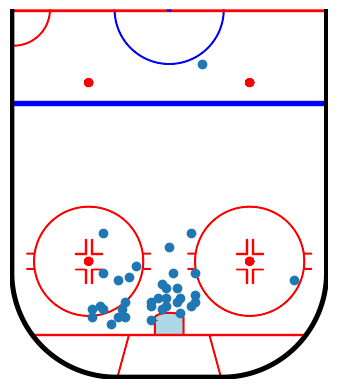

In [134]:
plotGoals(crosbyGoals)

Ovi Goals

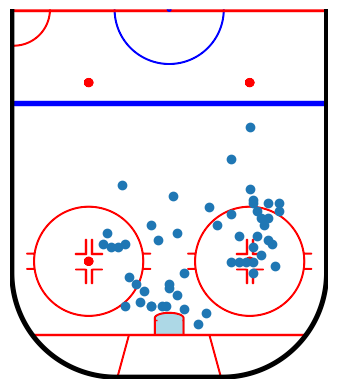

In [135]:
plotGoals(oviGoals)

As you can see, Ovi takes a lot more shots away from the net, especially on the right side